<a href="https://colab.research.google.com/github/yohei0408/kikagaku/blob/main/20240930_%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%AE%E5%9F%BA%E7%A4%8E%EF%BC%92%E3%80%80%E7%AB%A0%E6%9C%AB%E3%83%86%E3%82%B9%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/creditcard_train.csv')

In [3]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-8.367621,7.402969,-5.114191,-2.966792,-0.985904,-1.660018,0.397816,1.008250,5.290976,9.315735,...,-0.557927,0.349087,0.301734,0.662330,1.145939,-0.012273,1.513736,0.669504,0.69,0
1,-1.290662,0.764452,-0.169233,-1.688528,1.984718,-0.717210,1.667635,-0.228295,-0.959071,-0.679429,...,0.138615,0.390374,-0.678774,0.292254,1.425865,0.265341,0.051405,0.103879,55.47,0
2,-0.606860,0.233923,2.633361,-0.155762,-0.328850,-0.070593,0.173023,0.113394,0.680147,-0.686651,...,0.007393,0.265045,-0.040615,0.406088,-0.498823,0.121851,-0.046840,-0.087259,11.50,0
3,1.374168,-0.330389,0.812971,-0.183112,-1.074771,-0.933788,-0.544238,-0.348237,0.614925,0.080408,...,-0.134742,0.016793,0.002610,0.714527,0.536175,-0.307487,-0.003555,0.013024,10.00,0
4,-2.146505,-7.603113,-4.928224,1.449173,-2.083871,-0.984759,3.629816,-1.302973,-1.434148,-0.021909,...,1.274986,-0.857670,-2.109682,0.169338,-0.322888,0.777822,-0.552258,0.304777,2290.05,0


In [4]:
df.shape

(199364, 30)

In [7]:
df.duplicated(keep = False).value_counts()

,count
False,191085
True,8279


In [8]:
df_2 = df.drop_duplicates()
df_2.duplicated(keep=False).value_counts()

,count
False,194131


In [11]:
# 'Class' 列の 0 と 1 の数をカウント
class_counts = df_2['Class'].value_counts()

# 結果を表示
print(class_counts)


Class
0    193799
1       332
Name: count, dtype: int64


In [12]:
class_counts.get(0,0) / class_counts.get(1,0)

583.7319277108434

In [26]:
x_train = df_2.drop('Class', axis = 1).values
t_train = df_2['Class'].values
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(random_state=0)
random.fit(x_train,t_train)
print(random.score(x_train,t_train))

1.0


In [19]:
test = pd.read_csv('/content/creditcard_test.csv')
test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.101337,0.665808,-0.514168,-0.675752,1.087999,-0.681790,0.877323,-0.096356,0.265313,-1.297842,...,0.114197,0.500593,-0.066669,0.558720,-0.518068,0.367070,0.079707,0.131678,12.50,0
1,-1.678212,1.244794,0.947874,-2.101099,-0.811015,-1.037444,0.144664,0.465090,-1.137320,0.847260,...,-0.383548,-0.581462,0.033139,0.483823,-0.039289,0.078483,0.486383,0.291222,10.00,0
2,-1.407998,-0.094725,1.218361,-1.884626,0.639017,-1.127801,0.537467,-0.295973,-1.670308,0.022252,...,0.295294,0.836930,-0.367286,0.157457,0.840789,-0.160280,-0.210861,0.103780,29.95,0
3,2.025163,-1.001783,-0.855068,-0.506527,-0.793876,-0.197866,-0.779789,0.032557,-0.357041,1.015046,...,-0.298900,-0.427423,0.298094,0.747735,-0.426508,0.500501,-0.051892,-0.048338,50.27,0
4,0.477071,-1.295023,0.586617,1.599474,-1.215659,0.114858,-0.178181,0.090062,0.944582,-0.207109,...,0.299761,0.114989,-0.461395,-0.122341,0.381628,-0.245921,-0.013775,0.092648,380.00,0


In [25]:
x_test = test.drop('Class', axis = 1).values
t_test = test['Class'].values
print(random.score(x_test,t_test))

0.9994175265084875


In [28]:
# モデルの検証
print(random.score(x_train, t_train))
print(random.score(x_test, t_test))


1.0
0.9994175265084875


In [29]:
y_pred = random.predict(x_test)
from sklearn import metrics
labels = list(set(t))
c_matrix = metrics.confusion_matrix(t_test, y_pred, labels=labels)
c_matrix

array([[83971,     6],
       [   43,   104]])

In [30]:
precision = metrics.precision_score(t_test, y_pred, average=None)
recall = metrics.recall_score(t_test, y_pred, average=None)
f1 = metrics.f1_score(t_test, y_pred, average=None)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)

precision:  [0.99948818 0.94545455]
recall:  [0.99992855 0.70748299]
f1:  [0.99970832 0.80933852]


In [31]:
precision, recall, f1_score, total = metrics.precision_recall_fscore_support(t_test, y_pred)

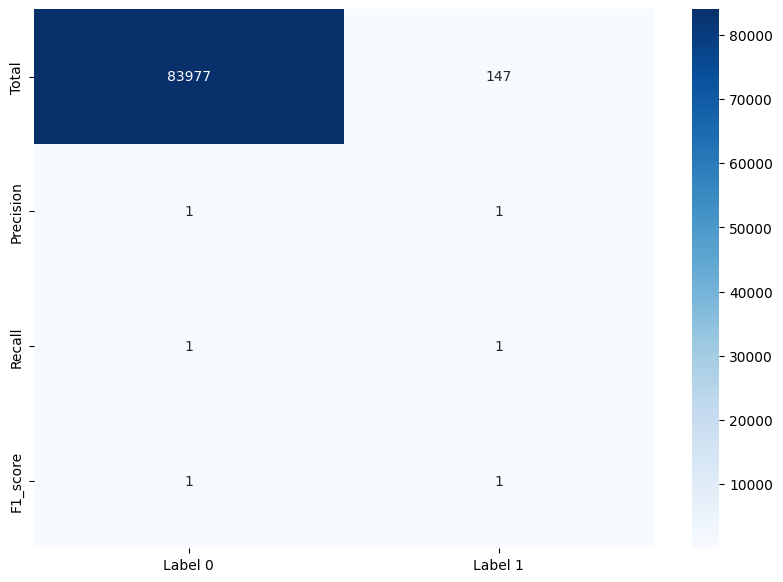

In [32]:
# ヒートマップで可視化
df_total = pd.DataFrame(
    np.array([total, precision, recall, f1_score]),
    index=['Total', 'Precision', 'Recall', 'F1_score'],
    columns=['Label 0','Label 1']
)

plt.figure(figsize=(10, 7))
sns.heatmap(df_total, annot=True, fmt='.0f', cmap='Blues');


In [71]:
y_proba  = random.predict_proba(x_test)

y_proba[0]

array([0.72, 0.28])

Text(0, 0.5, 'Count')

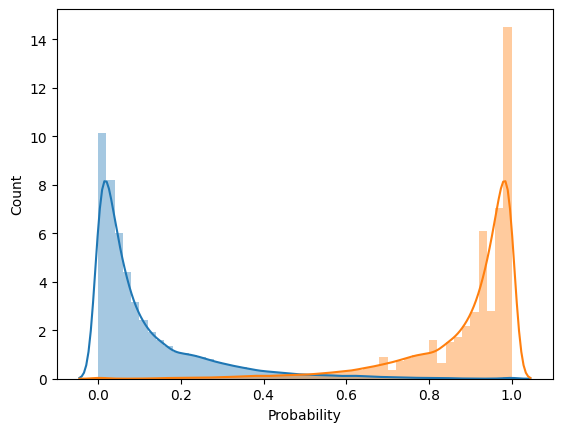

In [72]:
sns.distplot(y_proba[:, 1])
sns.distplot(y_proba[:, 0])
plt.xlabel('Probability')
plt.ylabel('Count')

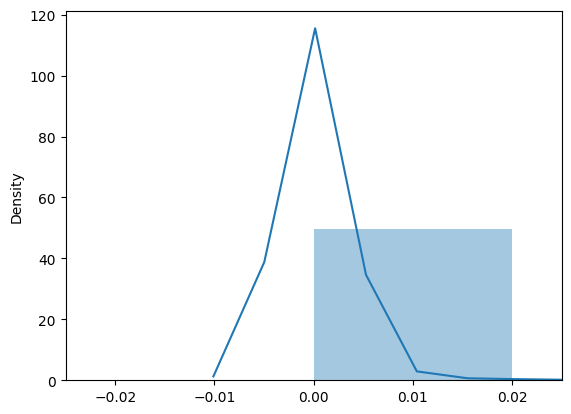

In [39]:
sns.distplot(y_proba[:, 1])
# 横軸の範囲を指定
plt.xlim(-0.025, 0.025)  # 例: 0から1の範囲

# グラフを表示
plt.show()

<Axes: ylabel='Density'>

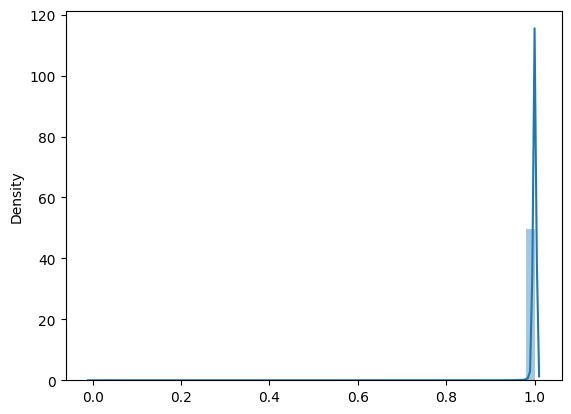

In [36]:
sns.distplot(y_proba[:, 0])

In [57]:
y_pred = (y_proba[:,1] > 0.2).astype('i')
precision = metrics.precision_score(t_test, y_pred, average=None)
recall = metrics.recall_score(t_test, y_pred, average=None)
f1 = metrics.f1_score(t_test, y_pred, average=None)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)

precision:  [0.99964281 0.86666667]
recall:  [0.99978566 0.79591837]
f1:  [0.99971423 0.82978723]


In [50]:
y_pred = (y_proba[:,0] > 0.1).astype('i')
precision = metrics.precision_score(t_test, y_pred, average=None)
recall = metrics.recall_score(t_test, y_pred, average=None)
f1 = metrics.f1_score(t_test, y_pred, average=None)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)

precision:  [0.         0.00103493]
recall:  [0.         0.59183673]
f1:  [0.         0.00206624]


In [74]:
# class_weight='balanced'の場合
random_w = RandomForestClassifier(random_state=0, class_weight='balanced')
random_w.fit(x_train, t_train)
print(random_w.score(x_train, t_train))
print(random_w.score(x_test, t_test))

1.0
0.9994650753649374


In [75]:
y_pred = random_w.predict(x_test)
y_proba  = random_w.predict_proba(x_test)
y_pred = (y_proba[:,1] > 0.5).astype('i')
precision = metrics.precision_score(t_test, y_pred, average=None)
recall = metrics.recall_score(t_test, y_pred, average=None)
f1 = metrics.f1_score(t_test, y_pred, average=None)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)

precision:  [0.99952388 0.95535714]
recall:  [0.99994046 0.72789116]
f1:  [0.99973213 0.82625483]


In [68]:
# ダウンサンプリングの場合
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_train_rus, t_train_rus = rus.fit_resample(x_train, t_train)
np.unique(t_train, return_counts=True)

(array([0, 1]), array([193799,    332]))

In [69]:
np.unique(t_train_rus, return_counts=True)

(array([0, 1]), array([332, 332]))

In [73]:
random = RandomForestClassifier(random_state=0)
random.fit(x_train_rus, t_train_rus)
y_pred = random.predict(x_test)
y_proba  = random.predict_proba(x_test)
y_pred = (y_proba[:,1] > 0.5).astype('i')
precision = metrics.precision_score(t_test, y_pred, average=None)
recall = metrics.recall_score(t_test, y_pred, average=None)
f1 = metrics.f1_score(t_test, y_pred, average=None)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)

precision:  [0.99979135 0.04913076]
recall:  [0.97003942 0.88435374]
f1:  [0.9846907  0.09308987]


In [76]:
# Over sampling
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, t_train_smote = smote.fit_resample(x_train, t_train)
np.unique(t_train_smote, return_counts=True)

(array([0, 1]), array([193799, 193799]))

In [77]:
random_smote = RandomForestClassifier(random_state=0)
random_smote.fit(x_train_smote, t_train_smote)
y_pred = random_smote.predict(x_test)
y_proba  = random_smote.predict_proba(x_test)
y_pred = (y_proba[:,1] > 0.5).astype('i')
precision = metrics.precision_score(t_test, y_pred, average=None)
recall = metrics.recall_score(t_test, y_pred, average=None)
f1 = metrics.f1_score(t_test, y_pred, average=None)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)

precision:  [0.99964284 0.90697674]
recall:  [0.9998571  0.79591837]
f1:  [0.99974996 0.84782609]
